<a href="https://colab.research.google.com/github/Gotchs/MachineLearning/blob/main/Kamaz_Classification_of_driver_actions_%7C_99_7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключение нужных слоев из модуля tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Матрица ошибок классификатора
from PIL import Image # Отрисовка изображений
from sklearn.model_selection import train_test_split # Разделение на обучающую и проверочную/тестовую выборку

import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка графиков
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import os # Для работы с файлами
import random # Генерация случайных чисел 
import gdown # Подключение модуля для загрузки данных из облака
import gc # Управление оперативной памятью колаба
from tensorflow.keras.models import load_model # Подключение возможности загрузки модели
from tensorflow.keras.callbacks import ModelCheckpoint # Сохранение лучшей эпохи модели

# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download(f'https://docs.google.com/uc?id=1SEo5nVezLTLEzcYLJSVZwMoVII7XVEO', None, quiet=True) # Почищенный архив

# Разархивация датасета в директорию '/content'
!unzip -qo "reality.zip" -d /content/data

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/data/'

os.listdir(IMAGE_PATH)

# Определение списка имен классов
CLASS_LIST = sorted(os.listdir(IMAGE_PATH))

# Определение количества классов
CLASS_COUNT = len(CLASS_LIST)

# Проверка результата
#print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

Downloading...
From: https://storage.yandexcloud.net/aiueducation/marketing/datasets/reality.zip
To: /content/reality.zip
100%|██████████| 127M/127M [00:13<00:00, 9.48MB/s]


Размер класса drinking составляет 300
Размер класса hair_and_makeup составляет 300
Размер класса operating_the_radio составляет 300
Размер класса reaching_behind составляет 300
Размер класса safe_driving составляет 300
Размер класса talking_on_the_phone_left составляет 300
Размер класса talking_on_the_phone_right составляет 300
Размер класса talking_to_passenger составляет 300
Размер класса texting_left составляет 300
Размер класса texting_right составляет 300

Общий размер базы для обучения: 3000


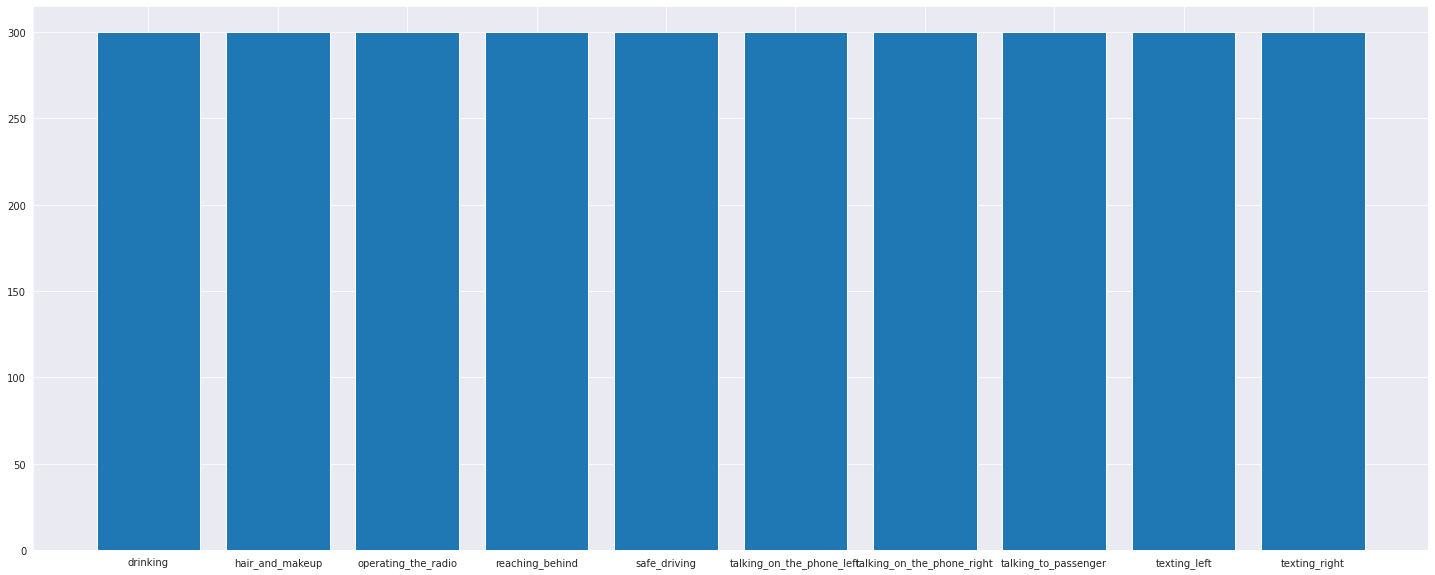

In [ ]:
data_files = []                           # Cписок путей к файлам картинок
data_labels = []                          # Список меток классов, соответствующих файлам
cnt_files = []                            # Количество файлов каждого класса

for class_label in range(CLASS_COUNT):    # Для всех классов по порядку номеров (их меток)
    class_name = CLASS_LIST[class_label]  # Выборка имени класса из списка имен
    class_path = IMAGE_PATH + class_name  # Формирование полного пути к папке с изображениями класса
    class_files = os.listdir(class_path)  # Получение списка имен файлов с изображениями текущего класса    
    cnt_files.append(len(class_files))
    print(f'Размер класса {class_name} составляет {len(class_files)}')
    # Добавление к общему списку всех файлов класса с добавлением родительского пути
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]

    # Добавление к общему списку меток текущего класса - их ровно столько, сколько файлов в классе
    data_labels += [class_label] * len(class_files)

print('\nОбщий размер базы для обучения:', len(data_labels))
plt.figure(figsize=(25,10))
plt.bar(CLASS_LIST, cnt_files)
plt.show()

In [ ]:
# Задание единых размеров изображений

IMG_WIDTH = 128                           # Ширина изображения
IMG_HEIGHT = 128                          # Высота изображения

In [ ]:
data_images = []                          # Пустой список для данных изображений
name_files = []                           # Имена файлов

for file_name in data_files:
    # Открытие и смена размера изображения
    img = Image.open(file_name).resize((IMG_WIDTH, IMG_HEIGHT))
    name_files.append(file_name)

    # Конвертация изображений в режиме CMYK в режим RGB
    if img.mode == 'CMYK':
     img = img.convert('RGB')
    
    # Конвертация изображений в режиме CMYK и RGB в режим градаций серого
    #if img.mode == 'RGB' or img.mode == 'CMYK':
    #  img = img.convert('L')

    img_np = np.array(img)                # Перевод в numpy-массив
    data_images.append(img_np)            # Добавление изображения в виде numpy-массива к общему списку


x_data = np.array(data_images)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(data_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'В массив собрано {len(data_images)} фотографий следующей формы: {img_np.shape}')
print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

В массив собрано 3000 фотографий следующей формы: (128, 128, 3)
Общий массив данных изображений следующей формы: (3000, 128, 128, 3)
Общий массив меток классов следующей формы: (3000,)


In [ ]:
# Нормированние массива изображений
x_data = x_data / 255.

**Несколько запусков**

1
Обучение №1 завершено. Результаты
Максимальная точность на обучающей выборке: 1.0
Максимальная точность на проверочной выборке: 0.99


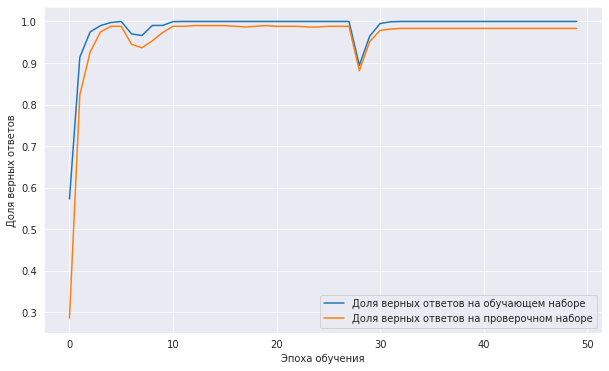





Обучение №2 завершено. Результаты
Максимальная точность на обучающей выборке: 1.0
Максимальная точность на проверочной выборке: 0.987


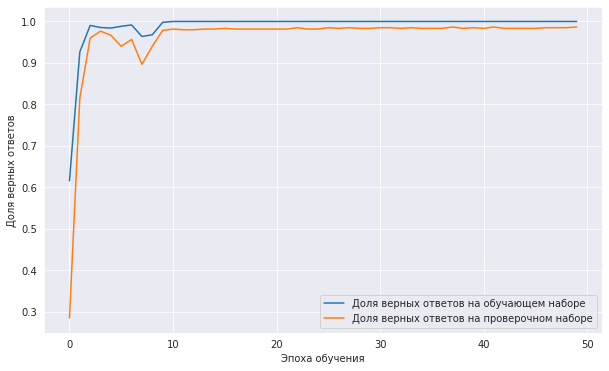





3
Обучение №3 завершено. Результаты
Максимальная точность на обучающей выборке: 1.0
Максимальная точность на проверочной выборке: 0.997


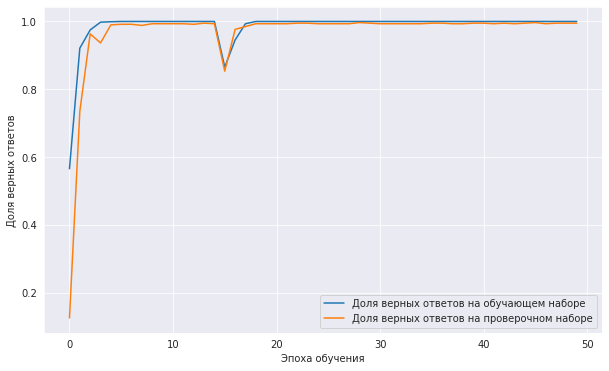





Обучение №4 завершено. Результаты
Максимальная точность на обучающей выборке: 1.0
Максимальная точность на проверочной выборке: 0.988


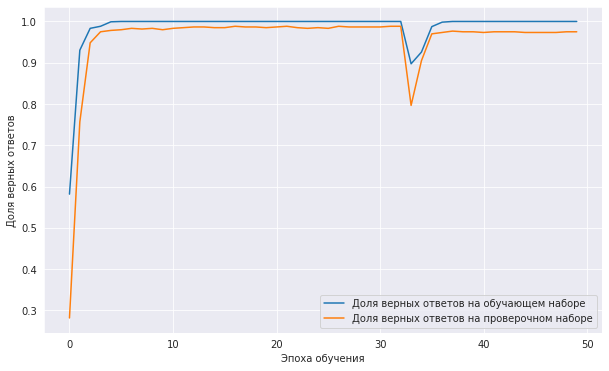





Обучение №5 завершено. Результаты
Максимальная точность на обучающей выборке: 1.0
Максимальная точность на проверочной выборке: 0.99


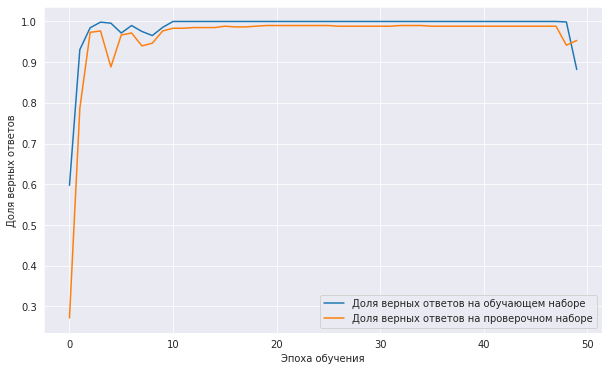





Средняя точность на обучающей выборке: 1.0
Максимальная точность на обучающей выборке: 1.0
Средняя точность на проверочной выборке: 0.99
Максимальная точность на проверочной выборке: 0.997


In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных
cnt = 5
history_accuracy = []
history_val_accuracy = []

# Переменные для записи тестовых выборок лучшей модели
best_x_test = 0
best_y_test = 0
best_x_train = 0
best_x_train = 0
bname_train = 0
bname_test = 0
nbmodel = 0          # Задаём переменную для сохранения номера лучшей модели

for i in range(cnt):

  # Сохраняем сеть на каждой эпохе
  # {epoch:02d} - номер эпохи
  # {val_acc:.4f} - значение аккуратности на проверочном ноборе данных
  # callbacks = [ModelCheckpoint('save/model-{epoch:02d}-{val_acc:.4f}.hdf5')]
  # Сохраняем только лучший вариант сети
  # callbacks = [ModelCheckpoint('save/model.hdf5', monitor='val_loss', save_best_only=True)]
  
  callbacks = [ModelCheckpoint('save/model'+str(i+1)+'.hdf5', monitor='val_loss', save_best_only=True)]

  # Разделение на обучающую и тестовую выборку
  x_train, x_test, y_train, y_test, name_train, name_test = train_test_split(x_data,          # набор параметров
                                                    y_data,            # набор меток классов
                                                    name_files,        # имена файлов
                                                    test_size=0.2,     # процент в тестовую
                                                    stratify=y_data,   # сделать равномерное разделение выборок
                                                    shuffle=True,      # перемешивание
                                                    random_state=3)    # воспроизводимость. Если 0, то всегда по разному. На реалити по умолчанию = 3

  # Создание модели последовательной архитектуры
  model = Sequential()

  # Первый сверточный блок
  model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
  model.add(BatchNormalization()) 
  model.add(MaxPooling2D(pool_size=(3, 3)))

  # Второй сверточный блок
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  # Блок классификации
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # Компиляция модели
  # По умолчанию learning_rate=0.0001 | Рекомендуется ставить здесь learning_rate меньше, чем learning_rate в дообучении
  model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
  
  store_learning = model.fit(x_train,
                            y_train,
                            validation_data=(x_test, y_test),
                            shuffle=True,
                            batch_size=10,
                            epochs=50, 
                            verbose=0,
                            callbacks=callbacks)
  

  history_accuracy.append(store_learning.history['accuracy'])
  history_val_accuracy.append(store_learning.history['val_accuracy'])

  # Сохраняем обучающую и тестовую выборку, на которых достигнута лучшая точность
  if np.array(store_learning.history['val_accuracy']).max() >= np.array(history_val_accuracy).max():
    nbmodel = i+1
    print(i+1)
    best_x_train = x_train
    best_y_train = y_train
    best_x_test = x_test
    best_y_test = y_test
    bname_train = name_train
    bname_test = name_test

  # Выводим сообщения и графики
  print(f'Обучение №{i+1} завершено. Результаты')
  print(f'Максимальная точность на обучающей выборке: {round(np.array(store_learning.history["accuracy"]).max(), 3)}')
  print(f'Максимальная точность на проверочной выборке: {round(np.array(store_learning.history["val_accuracy"]).max(), 3)}')
  plt.figure(1, figsize=(10, 6))
  plt.plot(store_learning.history['accuracy'], 
          label='Доля верных ответов на обучающем наборе')
  plt.plot(store_learning.history['val_accuracy'], 
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()
  print('\n'*3)

  # Очищаем оперативную память коллаба от мусора
  gc.collect()

print(f'Средняя точность на обучающей выборке: {round(np.array(history_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на обучающей выборке: {round(np.array(history_accuracy).max(), 3)}')
print(f'Средняя точность на проверочной выборке: {round(np.array(history_val_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на проверочной выборке: {round(np.array(history_val_accuracy).max(), 3)}')

# Загружаем лучшую эпоху из лучшего запуска

In [ ]:
# Загружаем/выбираем лучшую модель
best_model = load_model('save/model'+str(nbmodel)+'.hdf5')
print('Загружена лучшая эпоха лучшей модели с запуска №'+str(nbmodel)+' "save/model'+str(nbmodel)+'.hdf5"' )
print('\n')

# Проверям параметры модели
best_model.summary()

Загружена лучшая эпоха лучшей модели с запуска №3 "save/model3.hdf5"


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 42, 42, 32)       128       
 hNormalization)                                 

In [ ]:
# Ищем неправильно предсказанные картинки на тестовой выборке best_y_test, на которой обучилась лучшая модель
def show_picture(pic,predict,probability,label,name):
  fig, ax = plt.subplots(figsize=(35, 5))
  ax.set_title(f'Предсказание: {CLASS_LIST[predict]}:{probability*100:3.1f}%\n По факту: {CLASS_LIST[label]}\n ({name})', fontsize=10)
  plt.grid(visible=0)
  plt.axis(False)
  plt.imshow(pic)
  print("\n")

'''
for i in range(len(best_y_test)):
  x = np.expand_dims(best_x_test[i], axis=0)
  p = best_model.predict(x,verbose=0)
  if np.argmax(p) != best_y_test[i]:
    probability = p[0,np.argmax(p)]
    show_picture(best_x_test[i],np.argmax(p),probability,best_y_test[i],name_test[i])  
  plt.show()
'''

'\nfor i in range(len(best_y_test)):\n  x = np.expand_dims(best_x_test[i], axis=0)\n  p = best_model.predict(x,verbose=0)\n  if np.argmax(p) != best_y_test[i]:\n    probability = p[0,np.argmax(p)]\n    show_picture(best_x_test[i],np.argmax(p),probability,best_y_test[i],name_test[i])  \n  plt.show()\n'

### Дообучение лучшей модели нейронной сети с началом от её лучшей эпохи

In [ ]:
# Задаём имя для сохранения лучшей эпохи лучшей дообученной модели
callbacks = [ModelCheckpoint('save/s_best_model.hdf5', monitor='val_loss', save_best_only=True)]

# Компиляция модели | Параметры выбирайте сами. learning_rate желательно поставить меньше, чем в основном обучении.
best_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.000001), metrics=['accuracy'])

# Запускаем дообучение
best_store_learning = best_model.fit(best_x_train,
                          best_y_train,
                          validation_data=(best_x_test, best_y_test),
                          shuffle=True,
                          batch_size=7,
                          epochs=100, 
                          verbose=1,
                          callbacks=callbacks)

Epoch 1/100
343/343 [==============================] - 4s 9ms/step - loss: 2.3259e-05 - accuracy: 1.0000 - val_loss: 0.0151 - val_accuracy: 0.9933
Epoch 2/100
343/343 [==============================] - 3s 8ms/step - loss: 2.3234e-05 - accuracy: 1.0000 - val_loss: 0.0141 - val_accuracy: 0.9950
Epoch 3/100
343/343 [==============================] - 3s 8ms/step - loss: 2.0448e-05 - accuracy: 1.0000 - val_loss: 0.0139 - val_accuracy: 0.9950
Epoch 4/100
343/343 [==============================] - 3s 8ms/step - loss: 2.4147e-05 - accuracy: 1.0000 - val_loss: 0.0127 - val_accuracy: 0.9967
Epoch 5/100
343/343 [==============================] - 3s 8ms/step - loss: 1.6800e-05 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9950
Epoch 6/100
343/343 [==============================] - 3s 8ms/step - loss: 1.6628e-05 - accuracy: 1.0000 - val_loss: 0.0134 - val_accuracy: 0.9950
Epoch 7/100
343/343 [==============================] - 3s 8ms/step - loss: 1.7104e-05 - accuracy: 1.0000 - val_loss: 0

Средняя точность на обучающей выборке: 1.0
Максимальная точность на обучающей выборке: 1.0
Средняя точность на проверочной выборке: 0.997
Максимальная точность на проверочной выборке: 0.997


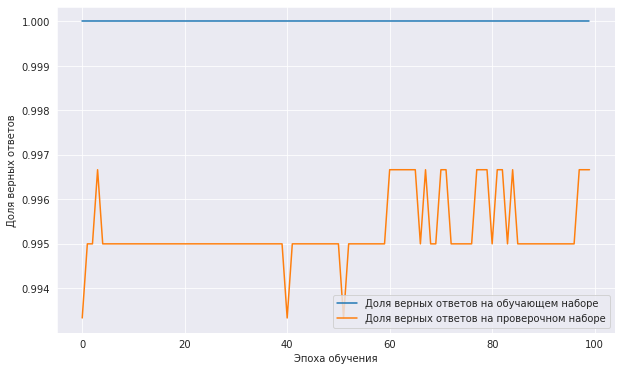

4106

In [ ]:
# Выводим лучшие показатели на дообучении
best_history_val_accuracy = []
best_history_accuracy =[]
best_history_accuracy.append(best_store_learning.history['accuracy'])
best_history_val_accuracy.append(best_store_learning.history['val_accuracy'])

print(f'Средняя точность на обучающей выборке: {round(np.array(best_history_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на обучающей выборке: {round(np.array(best_history_accuracy).max(), 3)}')
print(f'Средняя точность на проверочной выборке: {round(np.array(best_history_val_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на проверочной выборке: {round(np.array(best_history_val_accuracy).max(), 3)}')

plt.figure(1, figsize=(10, 6))
plt.plot(best_store_learning.history['accuracy'], 
        label='Доля верных ответов на обучающем наборе')
plt.plot(best_store_learning.history['val_accuracy'], 
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Очищаем оперативную память коллаба от мусора
gc.collect()

# Матрица ошибок для нашей лучшей модели

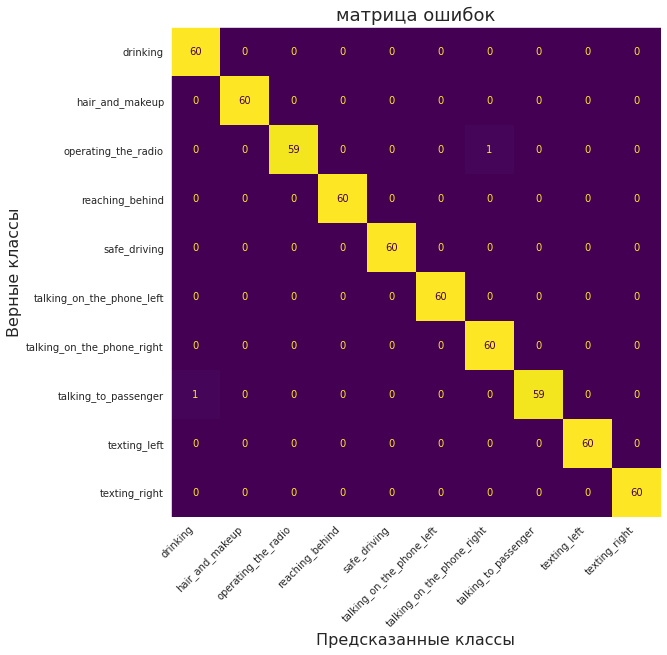

In [ ]:
def ShowConfusionMatrix(model, x_test, y_test):
  cm = confusion_matrix(y_test,
                        np.argmax(model.predict(x_test, verbose=0), axis=1))

  # Отрисовка матрицы ошибок
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.set_title(f'матрица ошибок', fontsize=18)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_LIST)
  disp.plot(ax=ax)
  plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
  plt.xlabel('Предсказанные классы', fontsize=16)
  plt.ylabel('Верные классы', fontsize=16)
  plt.grid(False)
  fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
  plt.show()    

# Делаем проверку улучшила ли модель свою точность после дообучения. Выбираем ту версию, которая показала больший результат.
if np.array(best_history_val_accuracy).max() > np.array(history_val_accuracy).max():
  print("Модель УСПЕШНО дообучилась.")
  ShowConfusionMatrix(best_model, best_x_test, best_y_test)  # Если после дообучения модель стала Лучше, то выводим её таблицу
else:
  best_model = load_model('save/model'+str(nbmodel)+'.hdf5') # Если после дообучения модель стала Хуже, то загружаем модель с основного обучения
  print("Дообучение ухудшило результат. Загружена исходная лучшая модель")
  ShowConfusionMatrix(best_model, best_x_test, best_y_test)  # Выводим таблицу для загруженной модели, т.к. она оказалась лучше


# Проверяем на каких картинках ошиблась наша лушая эпоха лучшей модели

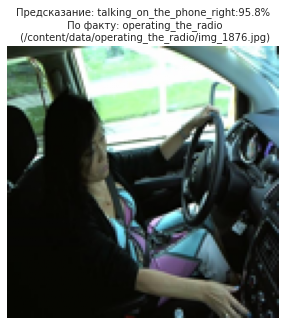

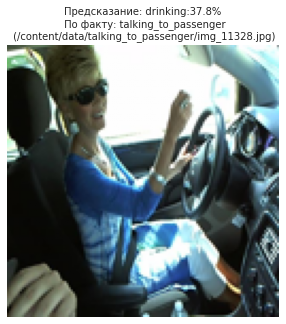

In [ ]:
# Ищем неправильно предсказанные картинки на тестовой выборке best_y_test, на которой дообучилась лучшая модель
for i in range(len(best_y_test)):
  x = np.expand_dims(best_x_test[i], axis=0)
  p = best_model.predict(x,verbose=0)
  if np.argmax(p) != best_y_test[i]:
    probability = p[0,np.argmax(p)]
    show_picture(best_x_test[i],np.argmax(p),probability,best_y_test[i],name_test[i])  
  plt.show()

In [ ]:
'''
# При необходимости сохраняем размеченные данные для лучшей модели.
# Скачать саму модель save/s_best_model.hdf5
np.save('best_x_train.npy', best_x_train)
np.save('best_y_train.npy', best_y_train)

np.save('best_x_test.npy', best_x_test)
np.save('best_y_test.npy', best_y_test)

np.save('bname_train.npy', bname_train)
np.save('bname_test.npy', bname_test)
'''